<a href="https://colab.research.google.com/github/kevalshah90/llms/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.getcwd()

'/content'

In [2]:
os.mkdir('/content/gpu')

In [3]:
os.chdir('/content/gpu/')
os.getcwd()

'/content/gpu'

In [18]:
import torch
import numpy as np
from torchviz import make_dot

In [17]:
!pip install torchviz
!sudo apt install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


**1. Creating Tensors**

Tensor shapes are represented as (row, column)

In [3]:
# Empty tensor (uninitialized values)
x = torch.empty(2,3)
print("Empty:\n", x)
print("Shape", x.shape)

Empty:
 tensor([[3.4822e-34, 0.0000e+00, 1.5526e-42],
        [4.5572e-41, 3.4822e-34, 0.0000e+00]])
Shape torch.Size([2, 3])


In [ ]:
# Tensor of zeros
zeros = torch.zeros(2, 3)
print("Zeros:\n", zeros)
print("Shape", zeros.shape)

Zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape torch.Size([2, 3])


In [ ]:
# Tensor of ones
ones = torch.ones(2, 3)
print("Ones:\n", ones)
print("Shape", ones.shape)

Ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Shape torch.Size([2, 3])


In [ ]:
# Random tensor
rand = torch.rand(2, 3)
print("Random:\n", rand)
print("Shape", rand.shape)

Random:
 tensor([[0.6682, 0.7786, 0.7509],
        [0.4421, 0.8565, 0.4874]])
Shape torch.Size([2, 3])


In [ ]:
# Tensor from data
data = torch.tensor([[1, 2], [3, 4]])
print("From data:\n", data)
print("Shape", data.shape)

From data:
 tensor([[1, 2],
        [3, 4]])
Shape torch.Size([2, 2])


In [ ]:
# Tensor from numpy
np_array = np.array([[1, 2], [3, 4]])
from_numpy = torch.from_numpy(np_array)
print("From numpy:\n", from_numpy)
print("Shape", from_numpy.shape)

From numpy:
 tensor([[1, 2],
        [3, 4]])
Shape torch.Size([2, 2])


**2. Manipulations / Basic Operations / Reshaping**

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

print("Shape a, b:", a.shape, b.shape)

# Addition
print("Addition:", a + b)

# Subtraction
print("Subtraction:", a - b)

# Multiplication
print("Multiplication:", a * b)

# Division
print("Division:", a / b)

Shape a, b: torch.Size([3]) torch.Size([3])
Addition: tensor([5, 7, 9])
Subtraction: tensor([-3, -3, -3])
Multiplication: tensor([ 4, 10, 18])
Division: tensor([0.2500, 0.4000, 0.5000])


In [ ]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
B = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Matrix multiplication
C = torch.mm(A, B)
print("Matrix Multiplication (mm):\n", C)

# Using @ operator
C2 = A @ B
print("Matrix Multiplication (@):\n", C2)

# Using matmul
C3 = torch.matmul(A, B)
print("Matrix Multiplication (matmul):\n", C3)

Matrix Multiplication (mm):
 tensor([[19., 22.],
        [43., 50.]])
Matrix Multiplication (@):
 tensor([[19., 22.],
        [43., 50.]])
Matrix Multiplication (matmul):
 tensor([[19., 22.],
        [43., 50.]])


In [4]:
# Reshaping
x = torch.arange(12)
print("Original:\n", x)
print("Shape:", x.shape)
reshaped = x.view(3, 4)
print("Reshaped:\n", reshaped)

Original:
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])
Reshaped:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [5]:
data = [1,2,3,4,5,6,7,8]
x = torch.tensor(data)             # Shape: (8,)
print("Original data:", x)
print("Original Shape:", x.shape)

Original data: tensor([1, 2, 3, 4, 5, 6, 7, 8])
Original Shape: torch.Size([8])


In [ ]:
x.view(2, 4)                       # Shape: (2, 4)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [6]:
y = x.reshape(2, 4)                # Shape: (2, 4)
print("Reshaped data:\n", y)
print("Reshaped Shape:", y.shape)

Reshaped data:
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Reshaped Shape: torch.Size([2, 4])


In [7]:
z = x.reshape(2, 2, 2)             # Shape: (2, 2, 2)
print("Reshaped data:\n", z)
print("Reshaped Shape:", z.shape)

Reshaped data:
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Reshaped Shape: torch.Size([2, 2, 2])


In [8]:
# Unsqueeze
# Adds a dimension of size 1 at the specified position (axis)
# useful for adding batch or channel dimensions.

x = torch.tensor([1, 2, 3, 4])     # Shape: (4,)
print("Original data:\n", x)
print("Original Shape:", x.shape)

Original data:
 tensor([1, 2, 3, 4])
Original Shape: torch.Size([4])


In [ ]:
# Add a new dimension at position 0 (front)
y = torch.unsqueeze(x, 0)          # Shape: (1, 4)
print("Unsqueezed data:\n", y)
print("Unsqueezed Shape:", y.shape)

Unsqueezed data:
 tensor([[1, 2, 3, 4]])
Unsqueezed Shape: torch.Size([1, 4])


In [ ]:
# Add a new dimension at position 1 (end)
z = torch.unsqueeze(x, 1)          # Shape: (4, 1)
print("Unsqueezed data:\n", z)
print("Unsqueezed Shape:", z.shape)

Unsqueezed data:
 tensor([[1],
        [2],
        [3],
        [4]])
Unsqueezed Shape: torch.Size([4, 1])


In [9]:
# Squeeze
# Removes dimensions of size 1.
# If a specific dimension is given, only squeezes that dimension if its size is 1.

x = torch.ones(2, 1, 2)            # Shape: (2, 1, 2)
print("Original data:\n", x)
print("Original Shape:", x.shape)

Original data:
 tensor([[[1., 1.]],

        [[1., 1.]]])
Original Shape: torch.Size([2, 1, 2])


In [11]:
y = torch.squeeze(x, dim=1)               # Shape: (2, 2)
print("Squeezed data:\n", y)
print("Squeezed Shape:", y.shape)

Squeezed data:
 tensor([[1., 1.],
        [1., 1.]])
Squeezed Shape: torch.Size([2, 2])


In [ ]:
z = torch.squeeze(x, 1)            # Shape: (2, 2)
print("Squeezed data:\n", z)
print("Squeezed Shape:", z.shape)

Squeezed data:
 tensor([[1., 1.],
        [1., 1.]])
Squeezed Shape: torch.Size([2, 2])


**3. Autograd**

. Autograd: Automatic Differentiation & Computation Graphs
PyTorch’s `autograd` is an engine that automatically computes gradients for tensor operations, enabling efficient backpropagation for neural network training.

Here’s how it works:

	•	Computation Graph:
Every operation on tensors with `requires_grad=True` is recorded in a dynamic computation graph. This graph tracks how each tensor is derived from others, allowing PyTorch to compute derivatives using the chain rule.

	•	Automatic Differentiation:
When you call `.backward()` on a scalar output (like a loss), autograd traverses the computation graph from output to input, computing gradients for all tensors that have `requires_grad=True`

In [13]:
x = torch.ones(5)  # Input tensor
y = torch.zeros(3) # Target tensor
w = torch.randn(5, 3, requires_grad=True)  # Weights (parameters)
b = torch.randn(3, requires_grad=True)     # Bias (parameters)

print("Inputs:", x)
print("Inputs Shape:", x.shape)

print("Targets:", y)
print("Targets Shape:", y.shape)

print("Weights:", w)
print("Weights Shape:", w.shape)

print("Biases:", b)
print("Biases Shape:", b.shape)

Inputs: tensor([1., 1., 1., 1., 1.])
Inputs Shape: torch.Size([5])
Targets: tensor([0., 0., 0.])
Targets Shape: torch.Size([3])
Weights: tensor([[-0.0295,  0.8848, -0.5108],
        [ 2.2497,  2.3181, -0.7023],
        [-0.3785, -1.5514,  0.0183],
        [-1.1340,  1.0937,  0.0170],
        [ 0.7008, -0.7555,  1.3509]], requires_grad=True)
Weights Shape: torch.Size([5, 3])
Biases: tensor([-0.4831, -0.8344,  0.3304], requires_grad=True)
Biases Shape: torch.Size([3])


In [14]:
z = torch.matmul(x, w) + b
print("z:", z)
print("z Shape:", z.shape)

z: tensor([0.9254, 1.1552, 0.5035], grad_fn=<AddBackward0>)
z Shape: torch.Size([3])


In [15]:
# compute loss
# BCE: loss function for binary classification tasks, quantifies the difference between predicted probabilities and true binary labels (0 or 1),
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print("grad_fn for loss:", loss.grad_fn)

grad_fn for loss: <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f09a8a83b50>


In [16]:
loss.backward()  # Computes gradients for w and b
print("Weight gradient:\n", w.grad)    # Gradient of loss w.r.t. w
print("Bias gradient:\n", b.grad)    # Gradient of loss w.r.t. b

Weight gradient:
 tensor([[0.2387, 0.2535, 0.2078],
        [0.2387, 0.2535, 0.2078],
        [0.2387, 0.2535, 0.2078],
        [0.2387, 0.2535, 0.2078],
        [0.2387, 0.2535, 0.2078]])
Bias gradient:
 tensor([0.2387, 0.2535, 0.2078])


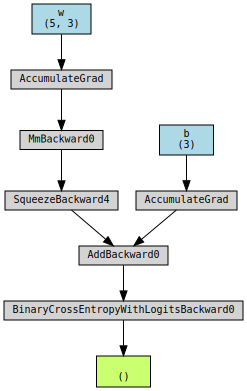

In [22]:
# Build the graph with parameters labeled
dot = make_dot(loss, params={'w': w, 'b': b})
# Display inline
dot

#dot.format = "png"
#dot.render("bce_autograd_graph", cleanup=True)

#print("Graph saved as bce_autograd_graph.png")

**4. Simple Neural Network**

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__() #
        self.fc1 = nn.Linear(4, 3)  # First linear layer
        self.relu = nn.ReLU()       # Activation
        self.fc2 = nn.Linear(3, 1)  # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

model = SimpleNet()
print("model:\n", model)

for name, param in model.named_parameters():
    print(name, param.shape)

model:
 SimpleNet(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)
fc1.weight torch.Size([3, 4])
fc1.bias torch.Size([3])
fc2.weight torch.Size([1, 3])
fc2.bias torch.Size([1])


**`nn.CrossEntropyLoss`**. This loss function is specifically designed for multi-class classification tasks where the goal is to predict the next token (word, subword, or character) from a vocabulary, which is the core objective in language modeling.

`CrossEntropyLoss`?

	•	Language modeling is a multi-class classification problem: for each position in the sequence, the model predicts one token out of the entire vocabulary.

	•	`nn.CrossEntropyLoss` combines `log_softmax` and negative log-likelihood loss in a single, numerically stable function.
  
	•	The model’s output (logits) should have shape `batch_size, vocab_size` for each time step, and the target should be the index of the correct next token.

In [ ]:
# Suppose output is [batch_size, vocab_size] and target is [batch_size]
output = torch.randn(32, 10000)  # logits for 32 samples, 10,000 vocab size
print("Output:\n", output)
print("Output Shape:", output.shape)

target = torch.randint(0, 10000, (32,))  # target token indices
print("Target:\n", target)
print("Target Shape:", target.shape)

Output:
 tensor([[-1.1844,  0.2629, -0.4970,  ..., -0.6772, -1.5638,  0.1890],
        [-0.8921, -0.2371,  0.1527,  ..., -0.6550,  0.0168,  0.6555],
        [ 0.2130, -1.4675, -1.2612,  ..., -0.5177, -0.3987, -0.2560],
        ...,
        [-0.0385, -1.6277,  0.8579,  ..., -1.2634,  0.1796,  0.6680],
        [ 0.1526,  0.8426, -1.1346,  ..., -0.3724,  0.2880, -1.0769],
        [ 0.1524,  1.1086,  0.0130,  ...,  2.1940,  1.7321, -0.4754]])
Output Shape: torch.Size([32, 10000])
Target:
 tensor([3363, 1050, 5131, 2486, 1400,  780, 4004, 1910,  472, 8286, 9509, 5565,
        3092, 4865, 8314,  249,   75, 9517, 3555, 8755, 8743, 9219, 9869, 6650,
        9243, 8029,  279, 7038, 4883, 9049, 5751, 8804])
Target Shape: torch.Size([32])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, target)
print("Loss:", loss)

Loss: tensor(9.7297)
